# 80. ID番号への変換
問題51で構築した学習データ中の単語にユニークなID番号を付与したい．学習データ中で最も頻出する単語に1，2番目に頻出する単語に2，……といった方法で，学習データ中で2回以上出現する単語にID番号を付与せよ．そして，与えられた単語列に対して，ID番号の列を返す関数を実装せよ．ただし，出現頻度が2回未満の単語のID番号はすべて0とせよ．

[link to this page (on google colaborate)](https://colab.research.google.com/drive/1jGI6u1zcZb2BuYFwB0xaMwWfsSMn_jmA?usp=sharing)

In [ ]:
!pip install texthero

     |████████████████████████████████| 235 kB 7.5 MB/s 
     |████████████████████████████████| 1.5 MB 41.3 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import texthero as hero
import pandas as pd
header = [
    "ID",
    "TITLE",
    "URL",
    "PUBLISHER",
    "CATEGORY",
    "STORY",
    "HOSTNAME",
    "TIMESTAMP",
]
df = pd.read_csv("/content/drive/MyDrive/data_nlp_100_09/newsCorpora.csv", delimiter="\t", names=header)
df.head(3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550


In [ ]:
target_publisher = [
    "Reuters", 
    "Huffington Post", 
    "Businessweek", 
    "Contactmusic.com", 
    "Daily Mail",
]

df = df.loc[df["PUBLISHER"].isin(target_publisher), ['TITLE', 'CATEGORY']]

category_map = {"b": 0, "t": 1, "e": 2, "m": 3}
df["CATEGORY"] = df["CATEGORY"].map(category_map)
df["TITLE"] = hero.clean(df["TITLE"], pipeline=[
    hero.preprocessing.fillna,
    hero.preprocessing.lowercase,
    hero.preprocessing.remove_digits,
    hero.preprocessing.remove_punctuation,
    hero.preprocessing.remove_diacritics,
  ]
)

In [ ]:
df.head()

,TITLE,CATEGORY
12,europe reaches crunch point on banking union,0
13,ecb focus stronger euro drowns out ecb s messa...,0
19,euro anxieties wane as bunds top treasuries s...,0
20,noyer says strong euro creates unwarranted eco...,0
29,refile bad loan triggers key feature in ecb ba...,0


In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, train_size=0.8, stratify=df["CATEGORY"], shuffle=True, random_state=0)
valid_df, test_df = train_test_split(temp_df, train_size=0.5, stratify=temp_df["CATEGORY"], shuffle=True, random_state=0)

In [ ]:
print(f"df: {len(df)}, train: {len(train_df)}, test: {len(test_df)}, valid: {len(valid_df)}")

df: 13340, train: 10672, test: 1334, valid: 1334


In [ ]:
valid_df["TITLE"]

106318    legendary comedian jerry lewis flips the bird ...
288788    mother s outrage after jetblue flight attendan...
320690    deal or no deal model s distraught husband tri...
40266     rolling stones   rolling stones to play in isr...
287542    jazz great jimmy scott  who turned his genetic...
                                ...                        
255138    twitter is getting bigger in asia amid deceler...
182649    rachel mcadams met gala dress   is pretty and ...
253577    watch denzel washington in the first trailer f...
111922    tax day freebies      good deals even if you d...
327009    even cavemen had to eat their greens    year o...
Name: TITLE, Length: 1334, dtype: object

In [ ]:
from collections import Counter

word_freq = Counter()
for words in train_df["TITLE"]:
  words = words.split()
  for word in words:
    word_freq[word] += 1
word_to_id = {word: idx if cnt >= 2 else 0 for idx, (word, cnt) in enumerate(word_freq.most_common())}


In [ ]:
import pickle
with open("dict.pkl", mode="wb") as f:
  pickle.dump(word_to_id, f)

In [ ]:
train_df["words_seq"] = [[word_to_id.get(word, 0) for word in title.split()] for title in train_df["TITLE"]]
valid_df["words_seq"] = [[word_to_id.get(word, 0) for word in title.split()] for title in valid_df["TITLE"]]
test_df["words_seq"] = [[word_to_id.get(word, 0) for word in title.split()] for title in test_df["TITLE"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
train_df.drop(columns="TITLE", inplace=True)
valid_df.drop(columns="TITLE", inplace=True)
test_df.drop(columns="TITLE", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
train_df.head()

,CATEGORY,words_seq
307341,0,"[2745, 515, 674, 2, 9, 1539, 0, 20]"
366806,0,"[8, 315, 389, 553, 6, 64, 7, 0, 230, 153]"
272258,0,"[49, 89, 19, 295, 97, 100, 28, 1004, 6, 34, 577]"
285727,0,"[8, 3706, 1823, 2746, 265, 5, 534, 1428, 3707]"
151203,2,"[1824, 1825, 108, 62, 27, 4399, 1187, 2, 1826,..."


In [ ]:
with open("./drive/MyDrive/data_nlp_100_09/output/train.feature.txt", mode="w") as f_train:
    train_df.to_csv(f_train, header=True, index=None, sep="\t")
    
with open("./drive/MyDrive/data_nlp_100_09/output/test.feature.txt", mode="w") as f_test:
    test_df.to_csv(f_test, header=True, index=None, sep="\t")
    
with open("./drive/MyDrive/data_nlp_100_09/output/valid.feature.txt", mode="w") as f_valid:
    valid_df.to_csv(f_valid, header=True, index=None, sep="\t")

# 81. RNNによる予測

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
# from torchinfo import summary

class MyRNN(nn.Module):
  def __init__(self, vocab_size, emb_size, padding_idx, output_size, hidden_size):
    super(MyRNN, self).__init__()
    self.hidden_size = hidden_size
    self.emb = nn.Embedding(vocab_size, emb_size, padding_idx)
    self.rnn = nn.RNN(emb_size, hidden_size, nonlinearity="tanh", batch_first=True)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    emb = self.emb(x)
    y_rnn, h = self.rnn(emb, None)
    y = self.fc(y_rnn[:, -1, :])
    return y

In [ ]:
n_labels = len(set(word_to_id.values()))
VOCAB_SIZE = n_labels + 1
EMB_SIZE = 300
PADDING_IDX = n_labels
OUTPUT_SIZE = 4
HIDDEN_SIZE = 50
model = MyRNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, HIDDEN_SIZE)
print(model)

MyRNN(
  (emb): Embedding(7529, 300, padding_idx=7528)
  (rnn): RNN(300, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=4, bias=True)
)


* とりあえず出力確認

In [ ]:
target_vector = [2745, 515, 674, 2, 9, 1539, 0, 20]
X = torch.Tensor(target_vector).to(int).unsqueeze(0)
y = model(X)
print(torch.softmax(y, dim=-1))

tensor([[0.1230, 0.3110, 0.2347, 0.3314]], grad_fn=<SoftmaxBackward>)


* 改めてデータセットをしっかり定義する

In [ ]:
import numpy as np

class CustomDataset(Dataset):
  def __init__(self, X, y):
    self.X = np.array(X)
    self.y = np.array(y)

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    text = self.X[idx]
    inputs = torch.tensor(text, dtype=torch.int64).clone()
    labels = torch.tensor(self.y[idx], dtype=torch.int64).clone()
    return {
      'inputs': inputs,
      'labels': labels
    }

In [ ]:
dataset_train = CustomDataset(train_df["words_seq"], train_df["CATEGORY"])
dataset_valid = CustomDataset(valid_df["words_seq"], valid_df["CATEGORY"])
dataset_test = CustomDataset(test_df["words_seq"], test_df["CATEGORY"])

In [ ]:
# testの先頭10件を確認
for i in range(10):
  X = dataset_test[i]['inputs']
  print(torch.softmax(model(X.unsqueeze(0)), dim=-1))

NameError: ignored

# 82. 確率的勾配降下法による学習

In [ ]:
from torch.utils.data import DataLoader
import time
from torch import optim

def calc_loss_and_accuracy(model, 
                            dataset, 
                            device='cpu', 
                            criterion=None,
                            ):
  """crossEntropyLossおよびaccuracyの計算を行う。"""
  model.to(device)
  dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
  loss = 0.0
  total = 0
  correct = 0
  with torch.no_grad():
    for data in dataloader:
      inputs = data['inputs'].to(device)
      labels = data['labels'].to(device)
      outputs = model(inputs)
      if criterion is not None:
        loss += criterion(outputs, labels).item()
      pred = torch.argmax(outputs, dim=-1)
      total += len(inputs)
      correct += (pred == labels).sum().item()
  return loss / len(dataset), correct / total

def train_model(dataset_train, 
                dataset_valid, 
                batch_size, 
                model, 
                criterion, 
                optimizer,
                num_epochs,
                collate_fn=None,
                device='cpu'
                ):
  model.to(device)
  dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
  dataloader_valid = DataLoader(dataset_valid, batch_size=1, shuffle=False)
  scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, num_epochs, eta_min=1e-5, last_epoch=-1)

  log_train = []
  log_valid = []
  for epoch in range(num_epochs):
    s_time = time.time()
    model.train()
    for data in dataloader_train:
      optimizer.zero_grad()
      inputs = data["inputs"].to(device)
      labels = data["labels"].to(device)
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

    model.eval()
    loss_train, acc_train = calc_loss_and_accuracy(model, 
                                                   dataset_train, 
                                                   device=device, 
                                                   criterion=criterion)
    loss_valid, acc_valid = calc_loss_and_accuracy(model, 
                                                   dataset_valid, 
                                                   device=device, 
                                                   criterion=criterion)
    log_train.append([loss_train, acc_train])
    log_valid.append([loss_valid, acc_valid])
    
    torch.save(
        obj={
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict()
        },
        f=f"checkpoint{epoch+1}.pt"
    )
    
    e_time = time.time()
    print(f"epoch: {epoch + 1}, loss_train: {loss_train:.4f}, accuracy_train: {acc_train:.4f}, loss_valid: {loss_valid:.4f}, accuracy_valid: {acc_valid:.4f}, {(e_time - s_time):.4f}sec")
    
    # validのlossが3連続下がらなかったらbreak
    if epoch > 2 and log_valid[epoch - 3][0] <= log_valid[epoch - 2][0] <= log_valid[epoch - 1][0] <= log_valid[epoch][0]:
      break

    scheduler.step()

  return {"train": log_train, "valid": log_valid}


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def visualize_logs(log):
  fig, ax = plt.subplots(1, 2, figsize=(15, 5))
  ax[0].plot(np.array(log['train']).T[0], label='train')
  ax[0].plot(np.array(log['valid']).T[0], label='valid')
  ax[0].set_xlabel('epoch')
  ax[0].set_ylabel('loss')
  ax[0].legend()
  ax[1].plot(np.array(log['train']).T[1], label='train')
  ax[1].plot(np.array(log['valid']).T[1], label='valid')
  ax[1].set_xlabel('epoch')
  ax[1].set_ylabel('accuracy')
  ax[1].legend()
  plt.show()

In [ ]:
n_labels = len(set(word_to_id.values()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": 50,
}
LEARNING_RATE = 1e-3
BATCH_SIZE = 1
NUM_EPOCHS = 10

model = MyRNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, device=device)

Using cuda device
epoch: 1, loss_train: 1.0834, accuracy_train: 0.5523, loss_valid: 1.0935, accuracy_valid: 0.5472, 37.3416sec
epoch: 2, loss_train: 0.9626, accuracy_train: 0.6256, loss_valid: 1.0059, accuracy_valid: 0.6117, 37.2176sec
epoch: 3, loss_train: 0.7923, accuracy_train: 0.7148, loss_valid: 0.8697, accuracy_valid: 0.6814, 37.3129sec
epoch: 4, loss_train: 0.6614, accuracy_train: 0.7644, loss_valid: 0.7772, accuracy_valid: 0.7271, 37.2303sec
epoch: 5, loss_train: 0.5637, accuracy_train: 0.7949, loss_valid: 0.7016, accuracy_valid: 0.7519, 36.9588sec
epoch: 6, loss_train: 0.5088, accuracy_train: 0.8167, loss_valid: 0.6581, accuracy_valid: 0.7684, 37.0329sec
epoch: 7, loss_train: 0.4650, accuracy_train: 0.8301, loss_valid: 0.6633, accuracy_valid: 0.7721, 37.0183sec
epoch: 8, loss_train: 0.4261, accuracy_train: 0.8435, loss_valid: 0.6140, accuracy_valid: 0.7834, 37.0748sec
epoch: 9, loss_train: 0.4149, accuracy_train: 0.8470, loss_valid: 0.6129, accuracy_valid: 0.7819, 37.0880sec
e

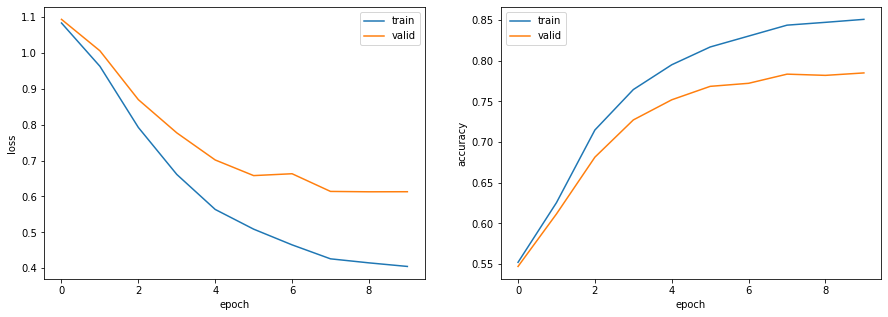

In [ ]:
visualize_logs(log)

In [ ]:
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

正解率(train): 0.8506
正解率(test): 0.7841


# 83. ミニバッチ化・GPU上での学習
- RNNにおいてミニバッチ化するためには，各words_seqの系列長を揃える必要がある
- 最大系列長に合わせてパディングするPadsequenceクラスを定義し，Dataloaderの引数collate_fnに渡すことで，ミニバッチの取り出しごとに系列長を揃えてくれる

In [ ]:
class Padsequence():
  def __init__(self, padding_idx):
    self.padding_idx = padding_idx

  def __call__(self, batch):
    sorted_batch = sorted(batch, key=lambda x: x['inputs'].shape[0], reverse=True)
    sequences = [x['inputs'] for x in sorted_batch]
    sequences_padded = torch.nn.utils.rnn.pad_sequence(sequences, batch_first=True, padding_value=self.padding_idx)
    labels = torch.LongTensor([x['labels'] for x in sorted_batch])
    return {'inputs': sequences_padded, "labels": labels}
  

In [ ]:
n_labels = len(set(word_to_id.values()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": 50,
}
PADDING_IDX = n_labels
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
NUM_EPOCHS = 50

model = MyRNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


Using cuda device
epoch: 1, loss_train: 1.4260, accuracy_train: 0.2732, loss_valid: 1.4203, accuracy_valid: 0.2751, 12.8029sec
epoch: 2, loss_train: 1.3889, accuracy_train: 0.3002, loss_valid: 1.3840, accuracy_valid: 0.3028, 12.5624sec
epoch: 3, loss_train: 1.3637, accuracy_train: 0.3110, loss_valid: 1.3593, accuracy_valid: 0.3163, 12.5132sec
epoch: 4, loss_train: 1.3474, accuracy_train: 0.3237, loss_valid: 1.3437, accuracy_valid: 0.3298, 12.5095sec
epoch: 5, loss_train: 1.3369, accuracy_train: 0.3304, loss_valid: 1.3336, accuracy_valid: 0.3373, 12.7141sec
epoch: 6, loss_train: 1.3299, accuracy_train: 0.3343, loss_valid: 1.3270, accuracy_valid: 0.3441, 12.5306sec
epoch: 7, loss_train: 1.3247, accuracy_train: 0.3396, loss_valid: 1.3224, accuracy_valid: 0.3561, 12.5693sec
epoch: 8, loss_train: 1.3214, accuracy_train: 0.3415, loss_valid: 1.3195, accuracy_valid: 0.3568, 12.6487sec
epoch: 9, loss_train: 1.3182, accuracy_train: 0.3443, loss_valid: 1.3168, accuracy_valid: 0.3583, 12.7228sec
e

In [ ]:
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

正解率(train): 0.3653
正解率(test): 0.3643


* バッチサイズあげるとだいぶ正解率落ちる(in test_dataset, batchsize=1: 0.7841-> batchsize=32: 0.3643)
* paddingしてる分がノイズとして働いている気がする（バッチサイズが大きければ多いほど系列長も大きくなりやすいのでバッチサイズに比例しそう）


# 84. 単語ベクトルの導入
* 現在のword_to_idに対応したembeddingを抽出する

In [ ]:
!ls drive/MyDrive/data_nlp_100_09

GoogleNews-vectors-negative300.bin  newsCorpora.csv  output  readme.txt


In [ ]:
from gensim.models import KeyedVectors

# 学習済みモデルのロード
model = KeyedVectors.load_word2vec_format('./drive/MyDrive/data_nlp_100_09/GoogleNews-vectors-negative300.bin', binary=True)


In [ ]:
import numpy as np

n_labels = len(set(word_to_id.keys()))
VOCAB_SIZE = n_labels + 1
EMB_SIZE = 300
weights = np.zeros((VOCAB_SIZE, EMB_SIZE))
words_in_pretrained = 0
for idx, word in enumerate(word_to_id.keys()):
  try:
    weights[idx] = model[word]
    words_in_pretrained += 1
  except KeyError:
    weights[idx] = np.random.normal(scale=0.4, size=(EMB_SIZE,))
weights = torch.from_numpy(weights.astype((np.float32)))

print(f"学習済ベクトル利用単語数: {words_in_pretrained} / {VOCAB_SIZE}")
print(weights.size())

学習済ベクトル利用単語数: 11011 / 12648
torch.Size([12648, 300])


* MyRNNの改良
  * embedding層に初期値を設定できるようにする
  * 次の問題用に双方向化，多層化のための設定を追加

In [ ]:
class MyRNN(nn.Module):
  def __init__(self, vocab_size, emb_size, padding_idx, output_size, hidden_size, num_layers, emb_weights=None, bidirectional=False):
    super(MyRNN, self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.bidirectional = bidirectional
    self.num_directions = int(bidirectional) + 1 #uni -> 1 bi -> 2
    if emb_weights != None:
      self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
    else:
      self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
    self.rnn = nn.RNN(emb_size, hidden_size, num_layers, nonlinearity="tanh", bidirectional=bidirectional, batch_first=True)
    self.fc = nn.Linear(hidden_size * self.num_directions, output_size)


  def forward(self, x):
    emb = self.emb(x)
    y_rnn, h = self.rnn(emb, None)
    y = self.fc(y_rnn[:, -1, :])
    return y

In [ ]:
n_labels = len(set(word_to_id.keys()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": 50,
    "num_layers": 1,
    "emb_weights": weights
}
PADDING_IDX = n_labels
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
NUM_EPOCHS = 50

model = MyRNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


Using cuda device
epoch: 1, loss_train: 1.3294, accuracy_train: 0.3588, loss_valid: 1.3279, accuracy_valid: 0.3561, 13.0013sec
epoch: 2, loss_train: 1.2864, accuracy_train: 0.3777, loss_valid: 1.2863, accuracy_valid: 0.3763, 12.8474sec
epoch: 3, loss_train: 1.2524, accuracy_train: 0.3831, loss_valid: 1.2533, accuracy_valid: 0.3801, 12.8837sec
epoch: 4, loss_train: 1.2262, accuracy_train: 0.3883, loss_valid: 1.2281, accuracy_valid: 0.3838, 12.9554sec
epoch: 5, loss_train: 1.2073, accuracy_train: 0.3906, loss_valid: 1.2099, accuracy_valid: 0.3928, 12.8618sec
epoch: 6, loss_train: 1.1949, accuracy_train: 0.3947, loss_valid: 1.1980, accuracy_valid: 0.4003, 12.9218sec
epoch: 7, loss_train: 1.1873, accuracy_train: 0.3966, loss_valid: 1.1907, accuracy_valid: 0.3981, 12.8534sec
epoch: 8, loss_train: 1.1828, accuracy_train: 0.3981, loss_valid: 1.1864, accuracy_valid: 0.4003, 13.0115sec
epoch: 9, loss_train: 1.1800, accuracy_train: 0.3986, loss_valid: 1.1836, accuracy_valid: 0.4010, 12.8231sec
e

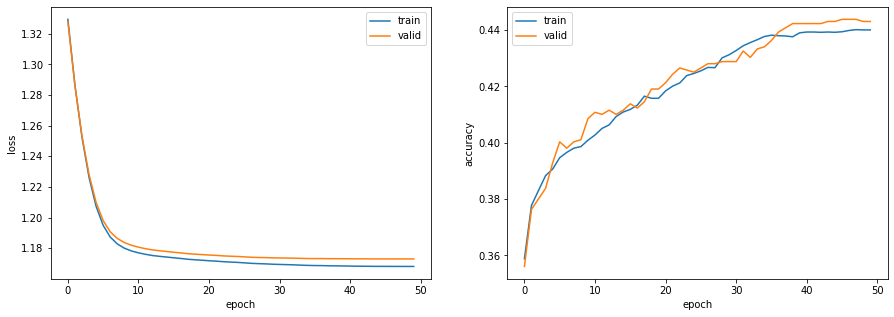

In [ ]:
visualize_logs(log)

In [ ]:
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

正解率(train): 0.4400
正解率(test): 0.4310


バッチサイズ1でもやってみる

In [ ]:
n_labels = len(set(word_to_id.keys()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": 50,
    "num_layers": 1,
    "emb_weights": weights
}
PADDING_IDX = n_labels
LEARNING_RATE = 1e-3
BATCH_SIZE = 1
NUM_EPOCHS = 10

model = MyRNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


Using cuda device
epoch: 1, loss_train: 0.6567, accuracy_train: 0.7621, loss_valid: 0.6776, accuracy_valid: 0.7556, 35.2736sec
epoch: 2, loss_train: 0.4731, accuracy_train: 0.8328, loss_valid: 0.5134, accuracy_valid: 0.8156, 34.5815sec
epoch: 3, loss_train: 0.4224, accuracy_train: 0.8534, loss_valid: 0.4725, accuracy_valid: 0.8456, 34.6946sec
epoch: 4, loss_train: 0.4009, accuracy_train: 0.8565, loss_valid: 0.4513, accuracy_valid: 0.8478, 34.3760sec
epoch: 5, loss_train: 0.3387, accuracy_train: 0.8829, loss_valid: 0.4031, accuracy_valid: 0.8643, 34.5314sec
epoch: 6, loss_train: 0.3213, accuracy_train: 0.8926, loss_valid: 0.3891, accuracy_valid: 0.8756, 34.3280sec
epoch: 7, loss_train: 0.2985, accuracy_train: 0.8992, loss_valid: 0.3704, accuracy_valid: 0.8808, 34.2227sec
epoch: 8, loss_train: 0.2939, accuracy_train: 0.9001, loss_valid: 0.3731, accuracy_valid: 0.8793, 34.2058sec
epoch: 9, loss_train: 0.2876, accuracy_train: 0.9019, loss_valid: 0.3655, accuracy_valid: 0.8786, 34.1750sec
e

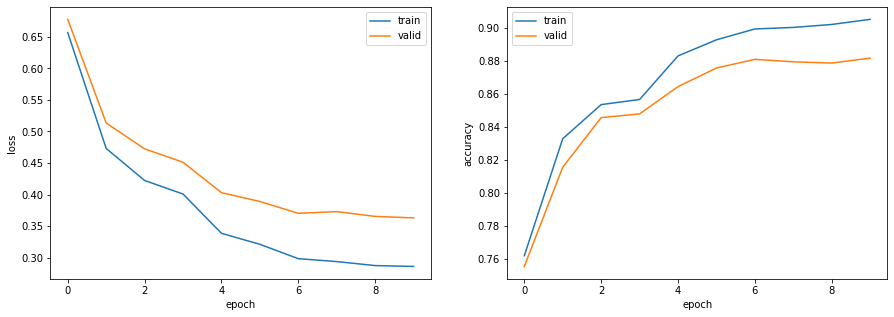

In [ ]:
visualize_logs(log)

In [ ]:
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

正解率(train): 0.9050
正解率(test): 0.8726


# 85. 双方向RNN・多層化
* bidirectionalをTrueにする
* NUM_LAYERSを2にする

In [ ]:
n_labels = len(set(word_to_id.keys()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": 50,
    "num_layers": 2,
    "emb_weights": weights,
    "bidirectional": True,
}
PADDING_IDX = n_labels
LEARNING_RATE = 1e-3
BATCH_SIZE = 32
NUM_EPOCHS = 10

model = MyRNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


Using cuda device
epoch: 1, loss_train: 1.2554, accuracy_train: 0.4374, loss_valid: 1.2615, accuracy_valid: 0.4400, 27.5792sec
epoch: 2, loss_train: 1.1960, accuracy_train: 0.4400, loss_valid: 1.2018, accuracy_valid: 0.4423, 27.6564sec
epoch: 3, loss_train: 1.1762, accuracy_train: 0.4440, loss_valid: 1.1818, accuracy_valid: 0.4423, 27.6141sec
epoch: 4, loss_train: 1.1693, accuracy_train: 0.4472, loss_valid: 1.1747, accuracy_valid: 0.4460, 27.6473sec
epoch: 5, loss_train: 1.1667, accuracy_train: 0.4506, loss_valid: 1.1720, accuracy_valid: 0.4460, 27.5450sec
epoch: 6, loss_train: 1.1655, accuracy_train: 0.4495, loss_valid: 1.1708, accuracy_valid: 0.4453, 27.5125sec
epoch: 7, loss_train: 1.1649, accuracy_train: 0.4497, loss_valid: 1.1701, accuracy_valid: 0.4483, 27.6066sec
epoch: 8, loss_train: 1.1646, accuracy_train: 0.4503, loss_valid: 1.1698, accuracy_valid: 0.4468, 27.5403sec
epoch: 9, loss_train: 1.1645, accuracy_train: 0.4509, loss_valid: 1.1697, accuracy_valid: 0.4483, 27.6455sec
e

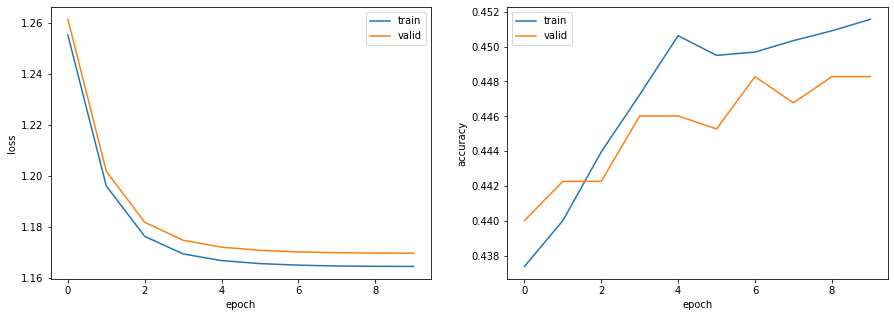

正解率(train): 0.4516
正解率(test): 0.4505


In [ ]:
visualize_logs(log)
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

In [ ]:
n_labels = len(set(word_to_id.keys()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": 50,
    "num_layers": 2,
    "emb_weights": weights,
    "bidirectional": True,
}
PADDING_IDX = n_labels
LEARNING_RATE = 1e-3
BATCH_SIZE = 1
NUM_EPOCHS = 10

model = MyRNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


Using cuda device
epoch: 1, loss_train: 0.6049, accuracy_train: 0.7785, loss_valid: 0.6331, accuracy_valid: 0.7699, 76.5859sec
epoch: 2, loss_train: 0.6694, accuracy_train: 0.7470, loss_valid: 0.7402, accuracy_valid: 0.7196, 77.2014sec
epoch: 3, loss_train: 0.4374, accuracy_train: 0.8431, loss_valid: 0.4772, accuracy_valid: 0.8298, 76.4613sec
epoch: 4, loss_train: 0.3913, accuracy_train: 0.8615, loss_valid: 0.4538, accuracy_valid: 0.8396, 76.3562sec
epoch: 5, loss_train: 0.3601, accuracy_train: 0.8757, loss_valid: 0.4284, accuracy_valid: 0.8576, 76.5283sec
epoch: 6, loss_train: 0.3295, accuracy_train: 0.8886, loss_valid: 0.4187, accuracy_valid: 0.8576, 76.8695sec
epoch: 7, loss_train: 0.3089, accuracy_train: 0.8949, loss_valid: 0.3931, accuracy_valid: 0.8681, 76.4779sec
epoch: 8, loss_train: 0.3110, accuracy_train: 0.8955, loss_valid: 0.4097, accuracy_valid: 0.8606, 76.7392sec
epoch: 9, loss_train: 0.2931, accuracy_train: 0.8984, loss_valid: 0.3784, accuracy_valid: 0.8673, 76.9136sec
e

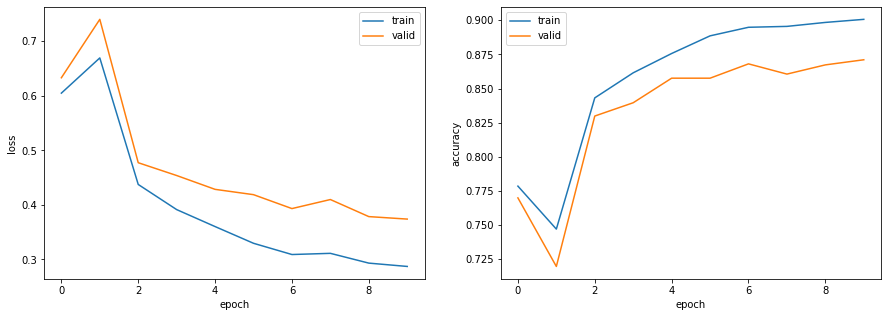

正解率(train): 0.9007
正解率(test): 0.8726


In [ ]:
visualize_logs(log)
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

# 86. 畳み込みニューラルネットワーク (CNN)

In [ ]:
from torch.nn import functional

class MyCNN(nn.Module):
  def __init__(self, vocab_size, emb_size, padding_idx, output_size, out_channels, kernel_heights, strides, padding, emb_weights=None):
    super().__init__()
    if emb_weights != None:
      self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
    else:
      self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
    self.conv = nn.Conv2d(1, out_channels, (kernel_heights, emb_size), strides, (padding, 0))
    self.drop = nn.Dropout(0.3)
    self.fc = nn.Linear(out_channels, output_size)

  def forward(self, x):
    emb = self.emb(x).unsqueeze(1)
    conv = self.conv(emb)
    act = functional.relu(conv.squeeze(3))
    max_pool = functional.max_pool1d(act, act.size()[2])
    out = self.fc(self.drop(max_pool.squeeze(2)))
    return out

In [ ]:
n_labels = len(set(word_to_id.keys()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "out_channels": 100,
    "kernel_heights": 3,
    "strides": 1,
    "padding": 1,
    "emb_weights": weights,
}

model = MyCNN(**model_params)

for i in range(10):
  X = dataset_train[i]["inputs"]
  print(torch.softmax(model(X.unsqueeze(0)), dim=-1))

tensor([[0.2113, 0.2997, 0.2617, 0.2273]], grad_fn=<SoftmaxBackward>)
tensor([[0.2612, 0.2565, 0.2608, 0.2216]], grad_fn=<SoftmaxBackward>)
tensor([[0.2931, 0.2209, 0.2686, 0.2174]], grad_fn=<SoftmaxBackward>)
tensor([[0.2404, 0.2544, 0.2754, 0.2299]], grad_fn=<SoftmaxBackward>)
tensor([[0.2499, 0.2633, 0.2581, 0.2286]], grad_fn=<SoftmaxBackward>)
tensor([[0.2748, 0.2442, 0.2504, 0.2306]], grad_fn=<SoftmaxBackward>)
tensor([[0.2523, 0.2542, 0.2427, 0.2508]], grad_fn=<SoftmaxBackward>)
tensor([[0.2302, 0.2409, 0.2869, 0.2419]], grad_fn=<SoftmaxBackward>)
tensor([[0.2656, 0.2514, 0.2550, 0.2280]], grad_fn=<SoftmaxBackward>)
tensor([[0.3126, 0.2370, 0.2602, 0.1903]], grad_fn=<SoftmaxBackward>)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning:

Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)



# 87. 確率的勾配降下法によるCNNの学習

In [ ]:
n_labels = len(set(word_to_id.keys()))
model_params = {
    "vocab_size": n_labels + 1,
    "emb_size": 300,
    "padding_idx": n_labels,
    "output_size": 4,
    "out_channels": 100,
    "kernel_heights": 3,
    "strides": 1,
    "padding": 1,
    "emb_weights": weights,
}
LEARNING_RATE = 5e-2
BATCH_SIZE = 64
NUM_EPOCHS = 10

model = MyCNN(**model_params)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)


device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


Using cuda device
epoch: 1, loss_train: 0.7314, accuracy_train: 0.7646, loss_valid: 0.7528, accuracy_valid: 0.7504, 10.6897sec
epoch: 2, loss_train: 0.5775, accuracy_train: 0.7826, loss_valid: 0.6160, accuracy_valid: 0.7699, 10.5214sec
epoch: 3, loss_train: 0.5062, accuracy_train: 0.8085, loss_valid: 0.5560, accuracy_valid: 0.7864, 10.4904sec
epoch: 4, loss_train: 0.4545, accuracy_train: 0.8401, loss_valid: 0.5129, accuracy_valid: 0.8178, 10.4697sec
epoch: 5, loss_train: 0.4131, accuracy_train: 0.8615, loss_valid: 0.4755, accuracy_valid: 0.8358, 10.3951sec
epoch: 6, loss_train: 0.3822, accuracy_train: 0.8776, loss_valid: 0.4491, accuracy_valid: 0.8568, 10.5449sec
epoch: 7, loss_train: 0.3627, accuracy_train: 0.8868, loss_valid: 0.4356, accuracy_valid: 0.8583, 10.4091sec
epoch: 8, loss_train: 0.3512, accuracy_train: 0.8901, loss_valid: 0.4243, accuracy_valid: 0.8666, 10.4346sec
epoch: 9, loss_train: 0.3463, accuracy_train: 0.8928, loss_valid: 0.4203, accuracy_valid: 0.8681, 10.4090sec
e

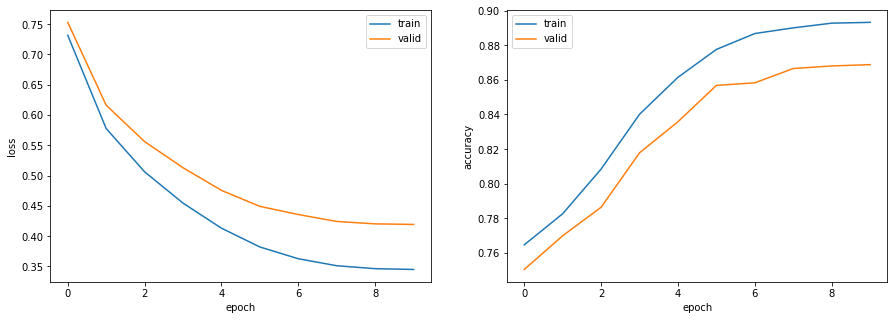

正解率(train): 0.8933
正解率(test): 0.8741


In [ ]:
visualize_logs(log)
_, acc_train = calc_loss_and_accuracy(model, dataset_train)
_, acc_test = calc_loss_and_accuracy(model, dataset_test)
print(f"正解率(train): {acc_train:.4f}")
print(f"正解率(test): {acc_test:.4f}")

88. パラメータチューニング
* LSTMを用いたモデルを作ってみる

In [ ]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets

class MyLSTM(nn.Module):
  def __init__(self, vocab_size, emb_size, padding_idx, output_size, hidden_size, num_layers, dropout=0.2, emb_weights=None, bidirectional=False):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.dropout = dropout
    self.bidirectional = bidirectional
    self.num_directions = int(bidirectional) + 1 #uni -> 1 bi -> 2
    if emb_weights != None:
      self.emb = nn.Embedding.from_pretrained(emb_weights, padding_idx=padding_idx)
    else:
      self.emb = nn.Embedding(vocab_size, emb_size, padding_idx=padding_idx)
    self.lstm = nn.LSTM(emb_size, hidden_size, num_layers, bidirectional=bidirectional, batch_first=True, dropout=dropout)
    self.fc = nn.Linear(hidden_size * self.num_directions, output_size)


  def forward(self, x):
    emb = self.emb(x)
    y_lstm, h = self.lstm(emb, None)
    y = self.fc(y_lstm[:, -1, :])
    return y

In [ ]:
!pip install optuna

     |████████████████████████████████| 302 kB 5.3 MB/s 
     |████████████████████████████████| 80 kB 8.9 MB/s 
     |████████████████████████████████| 208 kB 37.0 MB/s 
     |████████████████████████████████| 75 kB 4.2 MB/s 
     |████████████████████████████████| 141 kB 51.4 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 111 kB 53.3 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=1990bccb5d0a1aecbc9704eca29223ceb25c1d209767fce042059d2940bdc956
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import optuna

def objective(trial):
  out_channels = int(trial.suggest_discrete_uniform('out_channels', 50, 200, 50))
  learning_rate = trial.suggest_loguniform('learning_rate', 5e-4, 5e-2)
  momentum = trial.suggest_discrete_uniform('momentum', 0.5, 0.9, 0.1)
  batch_size = int(trial.suggest_discrete_uniform('batch_size', 16, 128, 16))
  
  n_labels = len(set(word_to_id.keys()))
  model_params = {
      "vocab_size": n_labels + 1,
      "emb_size": 300,
      "padding_idx": n_labels,
      "output_size": 4,
      "out_channels": out_channels,
      "kernel_heights": 3,
      "strides": 1,
      "padding": 1,
      "emb_weights": weights,
  }
  PADDING_IDX = n_labels
  NUM_EPOCHS = 30

  model = MyCNN(**model_params)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  log = train_model(dataset_train, dataset_valid, batch_size, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)

  loss_valid, _ = calc_loss_and_accuracy(model, dataset_valid)

  return loss_valid


"""def objective2(trial):
  emb_size = int(trial.suggest_discrete_uniform('emb_size', 100, 400, 100))
  drop_out = trial.suggest_discrete_uniform('dropout', 0.0, 0.5, 0.1)
  learning_rate = trial.suggest_loguniform('learning_rate', 5e-4, 5e-2)
  hidden_size = trial.suggest_discrete_uniform('hidden_size', 10, 100, 10)
  batch_size = int(trial.suggest_discrete_uniform('batch_size', 16, 128, 16))
  momentum = trial.suggest_discrete_uniform('momentum', 0.5, 0.9, 0.1)
  n_labels = len(set(word_to_id.keys()))
  model_params = {
    "vocab_size": n_labels,
    "emb_size": emb_size,
    "padding_idx": n_labels,
    "output_size": 4,
    "hidden_size": hidden_size,
    "num_layers": 2,
    "dropout": drop_out,
    "emb_weights": weights,
    "bidirectional": True,
  }

  model = MyLSTM(**model_params)
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
  device1 = 'cuda' if torch.cuda.is_available() else 'cpu'
  log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device1)

  loss_valid, _ = calc_loss_and_accuracy(model, dataset_valid)"""
  

'def objective2(trial):\n  emb_size = int(trial.suggest_discrete_uniform(\'emb_size\', 100, 400, 100))\n  drop_out = trial.suggest_discrete_uniform(\'dropout\', 0.0, 0.5, 0.1)\n  learning_rate = trial.suggest_loguniform(\'learning_rate\', 5e-4, 5e-2)\n  hidden_size = trial.suggest_discrete_uniform(\'hidden_size\', 10, 100, 10)\n  batch_size = int(trial.suggest_discrete_uniform(\'batch_size\', 16, 128, 16))\n  momentum = trial.suggest_discrete_uniform(\'momentum\', 0.5, 0.9, 0.1)\n  n_labels = len(set(word_to_id.keys()))\n  model_params = {\n    "vocab_size": n_labels,\n    "emb_size": emb_size,\n    "padding_idx": n_labels,\n    "output_size": 4,\n    "hidden_size": hidden_size,\n    "num_layers": 2,\n    "dropout": drop_out,\n    "emb_weights": weights,\n    "bidirectional": True,\n  }\n\n  model = MyLSTM(**model_params)\n  criterion = nn.CrossEntropyLoss()\n  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)\n  device1 = \'cuda\' if torch.cuda.is_av

In [ ]:
study = optuna.create_study()
study.optimize(objective, timeout=7200)

print("BEST trial:")
trial = study.best_trial
print(f"  value: {trial.value:.3f}")
print(f"  params: ")
for k, v in trial.params.items():
  print(f"     {k}: {v}")

[I 2021-09-11 01:36:28,126] A new study created in memory with name: no-name-6a2a75d5-2a4b-49e3-9ea5-6520518c6436
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:652: UserWarning:

Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)



epoch: 1, loss_train: 1.1308, accuracy_train: 0.6725, loss_valid: 1.1384, accuracy_valid: 0.6552, 10.3630sec
epoch: 2, loss_train: 1.0546, accuracy_train: 0.7287, loss_valid: 1.0646, accuracy_valid: 0.7144, 9.6575sec
epoch: 3, loss_train: 0.9678, accuracy_train: 0.7452, loss_valid: 0.9798, accuracy_valid: 0.7354, 9.7840sec
epoch: 4, loss_train: 0.8768, accuracy_train: 0.7522, loss_valid: 0.8911, accuracy_valid: 0.7399, 9.6398sec
epoch: 5, loss_train: 0.7966, accuracy_train: 0.7610, loss_valid: 0.8135, accuracy_valid: 0.7429, 9.7356sec
epoch: 6, loss_train: 0.7355, accuracy_train: 0.7650, loss_valid: 0.7556, accuracy_valid: 0.7489, 9.8394sec
epoch: 7, loss_train: 0.6908, accuracy_train: 0.7682, loss_valid: 0.7137, accuracy_valid: 0.7504, 9.7602sec
epoch: 8, loss_train: 0.6572, accuracy_train: 0.7719, loss_valid: 0.6834, accuracy_valid: 0.7549, 9.6531sec
epoch: 9, loss_train: 0.6311, accuracy_train: 0.7759, loss_valid: 0.6605, accuracy_valid: 0.7609, 9.5659sec
epoch: 10, loss_train: 0.61

[I 2021-09-11 01:41:21,444] Trial 0 finished with value: 0.0 and parameters: {'out_channels': 200.0, 'learning_rate': 0.0013182279255313568, 'momentum': 0.9, 'batch_size': 96.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.1566, accuracy_train: 0.6178, loss_valid: 1.1575, accuracy_valid: 0.6034, 9.6317sec
epoch: 2, loss_train: 1.0795, accuracy_train: 0.7254, loss_valid: 1.0844, accuracy_valid: 0.7226, 9.7317sec
epoch: 3, loss_train: 0.9985, accuracy_train: 0.7382, loss_valid: 1.0054, accuracy_valid: 0.7286, 9.7469sec
epoch: 4, loss_train: 0.9169, accuracy_train: 0.7448, loss_valid: 0.9253, accuracy_valid: 0.7391, 10.0766sec
epoch: 5, loss_train: 0.8446, accuracy_train: 0.7542, loss_valid: 0.8555, accuracy_valid: 0.7429, 10.0530sec
epoch: 6, loss_train: 0.7872, accuracy_train: 0.7583, loss_valid: 0.8010, accuracy_valid: 0.7451, 10.1069sec
epoch: 7, loss_train: 0.7423, accuracy_train: 0.7636, loss_valid: 0.7589, accuracy_valid: 0.7504, 10.0916sec
epoch: 8, loss_train: 0.7080, accuracy_train: 0.7650, loss_valid: 0.7278, accuracy_valid: 0.7511, 10.0993sec
epoch: 9, loss_train: 0.6811, accuracy_train: 0.7675, loss_valid: 0.7032, accuracy_valid: 0.7534, 10.0921sec
epoch: 10, loss_train:

[I 2021-09-11 01:46:24,425] Trial 1 finished with value: 0.0 and parameters: {'out_channels': 50.0, 'learning_rate': 0.0022226018069729284, 'momentum': 0.8, 'batch_size': 96.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.1496, accuracy_train: 0.6575, loss_valid: 1.1542, accuracy_valid: 0.6439, 10.1088sec
epoch: 2, loss_train: 1.0984, accuracy_train: 0.7176, loss_valid: 1.1055, accuracy_valid: 0.7031, 9.7089sec
epoch: 3, loss_train: 1.0438, accuracy_train: 0.7298, loss_valid: 1.0523, accuracy_valid: 0.7136, 9.6525sec
epoch: 4, loss_train: 0.9832, accuracy_train: 0.7436, loss_valid: 0.9930, accuracy_valid: 0.7271, 9.6501sec
epoch: 5, loss_train: 0.9191, accuracy_train: 0.7496, loss_valid: 0.9308, accuracy_valid: 0.7354, 9.8739sec
epoch: 6, loss_train: 0.8582, accuracy_train: 0.7561, loss_valid: 0.8722, accuracy_valid: 0.7429, 9.7872sec
epoch: 7, loss_train: 0.8054, accuracy_train: 0.7598, loss_valid: 0.8218, accuracy_valid: 0.7504, 9.7560sec
epoch: 8, loss_train: 0.7621, accuracy_train: 0.7626, loss_valid: 0.7805, accuracy_valid: 0.7519, 9.5452sec
epoch: 9, loss_train: 0.7274, accuracy_train: 0.7660, loss_valid: 0.7480, accuracy_valid: 0.7534, 9.7200sec
epoch: 10, loss_train: 0.69

[I 2021-09-11 01:51:19,116] Trial 2 finished with value: 0.0 and parameters: {'out_channels': 200.0, 'learning_rate': 0.0009502208131134619, 'momentum': 0.9, 'batch_size': 96.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.0956, accuracy_train: 0.7007, loss_valid: 1.1013, accuracy_valid: 0.6942, 9.6428sec
epoch: 2, loss_train: 0.9815, accuracy_train: 0.7393, loss_valid: 0.9897, accuracy_valid: 0.7279, 9.7030sec
epoch: 3, loss_train: 0.8573, accuracy_train: 0.7562, loss_valid: 0.8705, accuracy_valid: 0.7391, 9.7783sec
epoch: 4, loss_train: 0.7588, accuracy_train: 0.7640, loss_valid: 0.7766, accuracy_valid: 0.7459, 9.7915sec
epoch: 5, loss_train: 0.6921, accuracy_train: 0.7703, loss_valid: 0.7145, accuracy_valid: 0.7481, 9.7935sec
epoch: 6, loss_train: 0.6463, accuracy_train: 0.7744, loss_valid: 0.6735, accuracy_valid: 0.7564, 9.7487sec
epoch: 7, loss_train: 0.6129, accuracy_train: 0.7805, loss_valid: 0.6444, accuracy_valid: 0.7616, 9.7283sec
epoch: 8, loss_train: 0.5869, accuracy_train: 0.7841, loss_valid: 0.6216, accuracy_valid: 0.7691, 9.7955sec
epoch: 9, loss_train: 0.5660, accuracy_train: 0.7881, loss_valid: 0.6033, accuracy_valid: 0.7744, 9.9947sec
epoch: 10, loss_train: 0.547

[I 2021-09-11 01:56:13,930] Trial 3 finished with value: 0.0 and parameters: {'out_channels': 200.0, 'learning_rate': 0.007483558629299105, 'momentum': 0.5, 'batch_size': 80.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.0690, accuracy_train: 0.7189, loss_valid: 1.0783, accuracy_valid: 0.6957, 9.6780sec
epoch: 2, loss_train: 0.9139, accuracy_train: 0.7495, loss_valid: 0.9280, accuracy_valid: 0.7339, 9.7636sec
epoch: 3, loss_train: 0.7738, accuracy_train: 0.7606, loss_valid: 0.7931, accuracy_valid: 0.7481, 9.5934sec
epoch: 4, loss_train: 0.6863, accuracy_train: 0.7706, loss_valid: 0.7113, accuracy_valid: 0.7541, 9.9243sec
epoch: 5, loss_train: 0.6316, accuracy_train: 0.7765, loss_valid: 0.6634, accuracy_valid: 0.7624, 9.7433sec
epoch: 6, loss_train: 0.5936, accuracy_train: 0.7827, loss_valid: 0.6283, accuracy_valid: 0.7676, 9.6561sec
epoch: 7, loss_train: 0.5642, accuracy_train: 0.7889, loss_valid: 0.6053, accuracy_valid: 0.7736, 9.6919sec
epoch: 8, loss_train: 0.5400, accuracy_train: 0.7949, loss_valid: 0.5854, accuracy_valid: 0.7796, 9.6821sec
epoch: 9, loss_train: 0.5191, accuracy_train: 0.8040, loss_valid: 0.5695, accuracy_valid: 0.7849, 10.0285sec
epoch: 10, loss_train: 0.50

[I 2021-09-11 02:01:07,724] Trial 4 finished with value: 0.0 and parameters: {'out_channels': 200.0, 'learning_rate': 0.010665702071761346, 'momentum': 0.6, 'batch_size': 112.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.1667, accuracy_train: 0.5863, loss_valid: 1.1701, accuracy_valid: 0.5832, 9.6292sec
epoch: 2, loss_train: 1.1189, accuracy_train: 0.6882, loss_valid: 1.1259, accuracy_valid: 0.6919, 9.8145sec
epoch: 3, loss_train: 1.0745, accuracy_train: 0.7192, loss_valid: 1.0826, accuracy_valid: 0.7181, 9.8303sec
epoch: 4, loss_train: 1.0256, accuracy_train: 0.7359, loss_valid: 1.0345, accuracy_valid: 0.7264, 9.7409sec
epoch: 5, loss_train: 0.9726, accuracy_train: 0.7426, loss_valid: 0.9823, accuracy_valid: 0.7331, 9.8958sec
epoch: 6, loss_train: 0.9184, accuracy_train: 0.7498, loss_valid: 0.9294, accuracy_valid: 0.7384, 9.7676sec
epoch: 7, loss_train: 0.8666, accuracy_train: 0.7569, loss_valid: 0.8791, accuracy_valid: 0.7444, 9.9444sec
epoch: 8, loss_train: 0.8210, accuracy_train: 0.7592, loss_valid: 0.8354, accuracy_valid: 0.7489, 9.7040sec
epoch: 9, loss_train: 0.7827, accuracy_train: 0.7612, loss_valid: 0.7990, accuracy_valid: 0.7534, 9.6811sec
epoch: 10, loss_train: 0.751

[I 2021-09-11 02:06:02,401] Trial 5 finished with value: 0.0 and parameters: {'out_channels': 200.0, 'learning_rate': 0.0010962875569080518, 'momentum': 0.8, 'batch_size': 64.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.2223, accuracy_train: 0.4999, loss_valid: 1.2208, accuracy_valid: 0.4925, 10.1232sec
epoch: 2, loss_train: 1.1705, accuracy_train: 0.6585, loss_valid: 1.1724, accuracy_valid: 0.6364, 9.7503sec
epoch: 3, loss_train: 1.1434, accuracy_train: 0.6901, loss_valid: 1.1480, accuracy_valid: 0.6769, 9.6610sec
epoch: 4, loss_train: 1.1217, accuracy_train: 0.7083, loss_valid: 1.1281, accuracy_valid: 0.6912, 9.5172sec
epoch: 5, loss_train: 1.1015, accuracy_train: 0.7202, loss_valid: 1.1090, accuracy_valid: 0.7046, 9.5723sec
epoch: 6, loss_train: 1.0813, accuracy_train: 0.7282, loss_valid: 1.0898, accuracy_valid: 0.7121, 10.0105sec
epoch: 7, loss_train: 1.0614, accuracy_train: 0.7329, loss_valid: 1.0705, accuracy_valid: 0.7181, 9.6734sec
epoch: 8, loss_train: 1.0414, accuracy_train: 0.7346, loss_valid: 1.0511, accuracy_valid: 0.7204, 9.6592sec
epoch: 9, loss_train: 1.0219, accuracy_train: 0.7402, loss_valid: 1.0321, accuracy_valid: 0.7264, 9.6234sec
epoch: 10, loss_train: 1.0

[I 2021-09-11 02:10:54,572] Trial 6 finished with value: 0.0 and parameters: {'out_channels': 150.0, 'learning_rate': 0.001578589090321219, 'momentum': 0.6, 'batch_size': 112.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.1605, accuracy_train: 0.6011, loss_valid: 1.1638, accuracy_valid: 0.5900, 10.3783sec
epoch: 2, loss_train: 1.1144, accuracy_train: 0.6742, loss_valid: 1.1212, accuracy_valid: 0.6732, 10.3402sec
epoch: 3, loss_train: 1.0758, accuracy_train: 0.7015, loss_valid: 1.0840, accuracy_valid: 0.6994, 10.0614sec
epoch: 4, loss_train: 1.0351, accuracy_train: 0.7180, loss_valid: 1.0445, accuracy_valid: 0.7136, 10.2211sec
epoch: 5, loss_train: 0.9923, accuracy_train: 0.7280, loss_valid: 1.0028, accuracy_valid: 0.7234, 10.1469sec
epoch: 6, loss_train: 0.9486, accuracy_train: 0.7397, loss_valid: 0.9605, accuracy_valid: 0.7361, 10.4902sec
epoch: 7, loss_train: 0.9063, accuracy_train: 0.7463, loss_valid: 0.9193, accuracy_valid: 0.7384, 10.2016sec
epoch: 8, loss_train: 0.8669, accuracy_train: 0.7515, loss_valid: 0.8814, accuracy_valid: 0.7429, 10.3294sec
epoch: 9, loss_train: 0.8318, accuracy_train: 0.7555, loss_valid: 0.8474, accuracy_valid: 0.7429, 10.2908sec
epoch: 10, loss_tra

[I 2021-09-11 02:16:04,209] Trial 7 finished with value: 0.0 and parameters: {'out_channels': 200.0, 'learning_rate': 0.0006597026193452053, 'momentum': 0.7, 'batch_size': 32.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 0.8575, accuracy_train: 0.7534, loss_valid: 0.8716, accuracy_valid: 0.7391, 10.1224sec
epoch: 2, loss_train: 0.6418, accuracy_train: 0.7738, loss_valid: 0.6704, accuracy_valid: 0.7601, 10.1005sec
epoch: 3, loss_train: 0.5578, accuracy_train: 0.7914, loss_valid: 0.5990, accuracy_valid: 0.7744, 10.2767sec
epoch: 4, loss_train: 0.5018, accuracy_train: 0.8121, loss_valid: 0.5542, accuracy_valid: 0.7856, 10.2027sec
epoch: 5, loss_train: 0.4542, accuracy_train: 0.8431, loss_valid: 0.5150, accuracy_valid: 0.8148, 10.1475sec
epoch: 6, loss_train: 0.4088, accuracy_train: 0.8660, loss_valid: 0.4775, accuracy_valid: 0.8358, 10.1365sec
epoch: 7, loss_train: 0.3691, accuracy_train: 0.8848, loss_valid: 0.4469, accuracy_valid: 0.8568, 10.0408sec
epoch: 8, loss_train: 0.3348, accuracy_train: 0.8949, loss_valid: 0.4161, accuracy_valid: 0.8613, 10.3168sec
epoch: 9, loss_train: 0.3084, accuracy_train: 0.9023, loss_valid: 0.3926, accuracy_valid: 0.8711, 9.9892sec
epoch: 10, loss_trai

[I 2021-09-11 02:21:08,558] Trial 8 finished with value: 0.0 and parameters: {'out_channels': 150.0, 'learning_rate': 0.0027105737262657125, 'momentum': 0.9, 'batch_size': 48.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.3036, accuracy_train: 0.4137, loss_valid: 1.2980, accuracy_valid: 0.4153, 10.0739sec
epoch: 2, loss_train: 1.2343, accuracy_train: 0.5141, loss_valid: 1.2293, accuracy_valid: 0.5202, 10.0171sec
epoch: 3, loss_train: 1.1937, accuracy_train: 0.6150, loss_valid: 1.1912, accuracy_valid: 0.6147, 10.0989sec
epoch: 4, loss_train: 1.1669, accuracy_train: 0.6591, loss_valid: 1.1670, accuracy_valid: 0.6499, 10.0365sec
epoch: 5, loss_train: 1.1456, accuracy_train: 0.6822, loss_valid: 1.1478, accuracy_valid: 0.6649, 10.0041sec
epoch: 6, loss_train: 1.1267, accuracy_train: 0.6947, loss_valid: 1.1307, accuracy_valid: 0.6792, 10.0013sec
epoch: 7, loss_train: 1.1091, accuracy_train: 0.7081, loss_valid: 1.1145, accuracy_valid: 0.6897, 10.1469sec
epoch: 8, loss_train: 1.0920, accuracy_train: 0.7166, loss_valid: 1.0985, accuracy_valid: 0.6994, 9.9847sec
epoch: 9, loss_train: 1.0754, accuracy_train: 0.7227, loss_valid: 1.0828, accuracy_valid: 0.7099, 10.0593sec
epoch: 10, loss_trai

[I 2021-09-11 02:26:10,865] Trial 9 finished with value: 0.0 and parameters: {'out_channels': 50.0, 'learning_rate': 0.001381090412110436, 'momentum': 0.5, 'batch_size': 96.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 0.5659, accuracy_train: 0.7839, loss_valid: 0.6072, accuracy_valid: 0.7691, 10.0331sec
epoch: 2, loss_train: 0.4113, accuracy_train: 0.8704, loss_valid: 0.4812, accuracy_valid: 0.8426, 9.9893sec
epoch: 3, loss_train: 0.3027, accuracy_train: 0.9070, loss_valid: 0.3902, accuracy_valid: 0.8748, 10.0195sec
epoch: 4, loss_train: 0.2449, accuracy_train: 0.9249, loss_valid: 0.3478, accuracy_valid: 0.8861, 10.0562sec
epoch: 5, loss_train: 0.2092, accuracy_train: 0.9352, loss_valid: 0.3208, accuracy_valid: 0.8958, 10.0266sec
epoch: 6, loss_train: 0.1864, accuracy_train: 0.9407, loss_valid: 0.3102, accuracy_valid: 0.8936, 9.9163sec
epoch: 7, loss_train: 0.1658, accuracy_train: 0.9487, loss_valid: 0.2984, accuracy_valid: 0.8988, 9.9052sec
epoch: 8, loss_train: 0.1485, accuracy_train: 0.9560, loss_valid: 0.2887, accuracy_valid: 0.9010, 9.9368sec
epoch: 9, loss_train: 0.1343, accuracy_train: 0.9631, loss_valid: 0.2865, accuracy_valid: 0.9018, 9.9150sec
epoch: 10, loss_train: 0

[I 2021-09-11 02:31:08,311] Trial 10 finished with value: 0.0 and parameters: {'out_channels': 100.0, 'learning_rate': 0.04385331763516838, 'momentum': 0.8, 'batch_size': 128.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.1098, accuracy_train: 0.6897, loss_valid: 1.1166, accuracy_valid: 0.6604, 9.7479sec
epoch: 2, loss_train: 0.9701, accuracy_train: 0.7443, loss_valid: 0.9810, accuracy_valid: 0.7331, 9.7670sec
epoch: 3, loss_train: 0.8213, accuracy_train: 0.7570, loss_valid: 0.8367, accuracy_valid: 0.7466, 9.9701sec
epoch: 4, loss_train: 0.7168, accuracy_train: 0.7659, loss_valid: 0.7374, accuracy_valid: 0.7526, 10.0474sec
epoch: 5, loss_train: 0.6527, accuracy_train: 0.7710, loss_valid: 0.6791, accuracy_valid: 0.7594, 10.1635sec
epoch: 6, loss_train: 0.6100, accuracy_train: 0.7766, loss_valid: 0.6412, accuracy_valid: 0.7661, 10.1262sec
epoch: 7, loss_train: 0.5787, accuracy_train: 0.7838, loss_valid: 0.6150, accuracy_valid: 0.7699, 10.1183sec
epoch: 8, loss_train: 0.5530, accuracy_train: 0.7900, loss_valid: 0.5927, accuracy_valid: 0.7751, 10.0847sec
epoch: 9, loss_train: 0.5317, accuracy_train: 0.8001, loss_valid: 0.5753, accuracy_valid: 0.7849, 10.2239sec
epoch: 10, loss_train:

[I 2021-09-11 02:36:11,403] Trial 11 finished with value: 0.0 and parameters: {'out_channels': 50.0, 'learning_rate': 0.0035982689251615593, 'momentum': 0.8, 'batch_size': 80.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 0.5779, accuracy_train: 0.7827, loss_valid: 0.6147, accuracy_valid: 0.7676, 11.1255sec
epoch: 2, loss_train: 0.4378, accuracy_train: 0.8498, loss_valid: 0.5000, accuracy_valid: 0.8231, 11.1227sec
epoch: 3, loss_train: 0.3299, accuracy_train: 0.8994, loss_valid: 0.4110, accuracy_valid: 0.8696, 11.0574sec
epoch: 4, loss_train: 0.2677, accuracy_train: 0.9154, loss_valid: 0.3643, accuracy_valid: 0.8808, 11.0982sec
epoch: 5, loss_train: 0.2287, accuracy_train: 0.9296, loss_valid: 0.3391, accuracy_valid: 0.8913, 11.0837sec
epoch: 6, loss_train: 0.1995, accuracy_train: 0.9397, loss_valid: 0.3195, accuracy_valid: 0.9018, 11.0359sec
epoch: 7, loss_train: 0.1784, accuracy_train: 0.9480, loss_valid: 0.3071, accuracy_valid: 0.9040, 11.1018sec
epoch: 8, loss_train: 0.1625, accuracy_train: 0.9522, loss_valid: 0.3017, accuracy_valid: 0.8996, 11.0967sec
epoch: 9, loss_train: 0.1481, accuracy_train: 0.9569, loss_valid: 0.2933, accuracy_valid: 0.9018, 11.0270sec
epoch: 10, loss_tra

[I 2021-09-11 02:41:45,348] Trial 12 finished with value: 0.0 and parameters: {'out_channels': 100.0, 'learning_rate': 0.002509348741206365, 'momentum': 0.9, 'batch_size': 16.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.2988, accuracy_train: 0.3973, loss_valid: 1.2945, accuracy_valid: 0.3988, 10.0439sec
epoch: 2, loss_train: 1.2405, accuracy_train: 0.4428, loss_valid: 1.2364, accuracy_valid: 0.4385, 10.0346sec
epoch: 3, loss_train: 1.2053, accuracy_train: 0.5333, loss_valid: 1.2027, accuracy_valid: 0.5187, 9.7060sec
epoch: 4, loss_train: 1.1828, accuracy_train: 0.6070, loss_valid: 1.1820, accuracy_valid: 0.6012, 9.7099sec
epoch: 5, loss_train: 1.1665, accuracy_train: 0.6551, loss_valid: 1.1673, accuracy_valid: 0.6439, 9.6992sec
epoch: 6, loss_train: 1.1532, accuracy_train: 0.6800, loss_valid: 1.1553, accuracy_valid: 0.6702, 10.1224sec
epoch: 7, loss_train: 1.1417, accuracy_train: 0.6943, loss_valid: 1.1447, accuracy_valid: 0.6859, 9.7776sec
epoch: 8, loss_train: 1.1310, accuracy_train: 0.7022, loss_valid: 1.1348, accuracy_valid: 0.6897, 9.5920sec
epoch: 9, loss_train: 1.1211, accuracy_train: 0.7091, loss_valid: 1.1255, accuracy_valid: 0.6987, 9.7565sec
epoch: 10, loss_train: 1.

[I 2021-09-11 02:46:41,161] Trial 13 finished with value: 0.0 and parameters: {'out_channels': 100.0, 'learning_rate': 0.0005186650214477373, 'momentum': 0.8, 'batch_size': 128.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.0098, accuracy_train: 0.7358, loss_valid: 1.0198, accuracy_valid: 0.7196, 9.7706sec
epoch: 2, loss_train: 0.7892, accuracy_train: 0.7609, loss_valid: 0.8080, accuracy_valid: 0.7466, 9.7270sec
epoch: 3, loss_train: 0.6645, accuracy_train: 0.7717, loss_valid: 0.6915, accuracy_valid: 0.7549, 9.6855sec
epoch: 4, loss_train: 0.5999, accuracy_train: 0.7820, loss_valid: 0.6334, accuracy_valid: 0.7714, 9.8157sec
epoch: 5, loss_train: 0.5578, accuracy_train: 0.7906, loss_valid: 0.5982, accuracy_valid: 0.7819, 10.0574sec
epoch: 6, loss_train: 0.5234, accuracy_train: 0.8012, loss_valid: 0.5715, accuracy_valid: 0.7849, 9.7783sec
epoch: 7, loss_train: 0.4950, accuracy_train: 0.8133, loss_valid: 0.5488, accuracy_valid: 0.7939, 9.7060sec
epoch: 8, loss_train: 0.4697, accuracy_train: 0.8319, loss_valid: 0.5308, accuracy_valid: 0.8081, 9.6963sec
epoch: 9, loss_train: 0.4451, accuracy_train: 0.8430, loss_valid: 0.5079, accuracy_valid: 0.8103, 9.8628sec
epoch: 10, loss_train: 0.42

[I 2021-09-11 02:51:36,533] Trial 14 finished with value: 0.0 and parameters: {'out_channels': 150.0, 'learning_rate': 0.006668687339850765, 'momentum': 0.7, 'batch_size': 64.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 0.5781, accuracy_train: 0.7866, loss_valid: 0.6123, accuracy_valid: 0.7789, 9.5492sec
epoch: 2, loss_train: 0.4422, accuracy_train: 0.8460, loss_valid: 0.5000, accuracy_valid: 0.8253, 9.6249sec
epoch: 3, loss_train: 0.3298, accuracy_train: 0.8925, loss_valid: 0.4034, accuracy_valid: 0.8703, 9.6497sec
epoch: 4, loss_train: 0.2665, accuracy_train: 0.9146, loss_valid: 0.3573, accuracy_valid: 0.8838, 9.9862sec
epoch: 5, loss_train: 0.2268, accuracy_train: 0.9293, loss_valid: 0.3324, accuracy_valid: 0.8876, 10.0209sec
epoch: 6, loss_train: 0.2016, accuracy_train: 0.9342, loss_valid: 0.3132, accuracy_valid: 0.8966, 10.0998sec
epoch: 7, loss_train: 0.1796, accuracy_train: 0.9478, loss_valid: 0.3042, accuracy_valid: 0.8973, 10.0609sec
epoch: 8, loss_train: 0.1612, accuracy_train: 0.9529, loss_valid: 0.2969, accuracy_valid: 0.8988, 10.0816sec
epoch: 9, loss_train: 0.1480, accuracy_train: 0.9566, loss_valid: 0.2882, accuracy_valid: 0.9010, 9.9627sec
epoch: 10, loss_train: 0

[I 2021-09-11 02:56:37,784] Trial 15 finished with value: 0.0 and parameters: {'out_channels': 50.0, 'learning_rate': 0.018131049239225348, 'momentum': 0.9, 'batch_size': 96.0}. Best is trial 0 with value: 0.0.


epoch: 1, loss_train: 1.1907, accuracy_train: 0.5227, loss_valid: 1.1898, accuracy_valid: 0.5172, 10.1355sec
epoch: 2, loss_train: 1.1451, accuracy_train: 0.6102, loss_valid: 1.1499, accuracy_valid: 0.6049, 10.1452sec
epoch: 3, loss_train: 1.1064, accuracy_train: 0.6644, loss_valid: 1.1131, accuracy_valid: 0.6514, 10.0709sec
epoch: 4, loss_train: 1.0657, accuracy_train: 0.7076, loss_valid: 1.0730, accuracy_valid: 0.6912, 9.7957sec
epoch: 5, loss_train: 1.0216, accuracy_train: 0.7313, loss_valid: 1.0295, accuracy_valid: 0.7204, 9.9080sec
epoch: 6, loss_train: 0.9745, accuracy_train: 0.7409, loss_valid: 0.9830, accuracy_valid: 0.7309, 9.7944sec
epoch: 7, loss_train: 0.9262, accuracy_train: 0.7497, loss_valid: 0.9358, accuracy_valid: 0.7384, 9.8012sec
epoch: 8, loss_train: 0.8800, accuracy_train: 0.7530, loss_valid: 0.8907, accuracy_valid: 0.7399, 9.8067sec
epoch: 9, loss_train: 0.8387, accuracy_train: 0.7566, loss_valid: 0.8507, accuracy_valid: 0.7436, 9.7993sec
epoch: 10, loss_train: 0.

GPUのランタイム制限がかかって最後までできなかったがまあ動いたのでヨシ！

In [4]:
!ls


drive  sample_data
